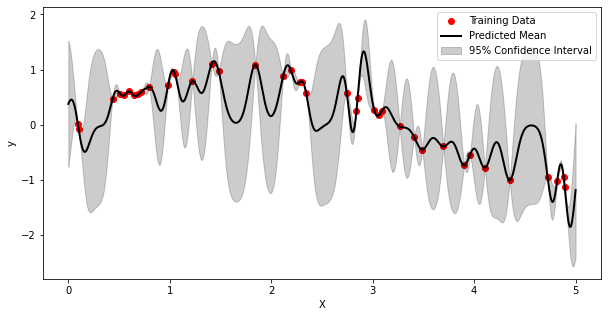

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Define the kernel (RBF kernel)
kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Fit the Gaussian Process model to the training data
gp.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x[:, 0], y_mean - 1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
                 np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

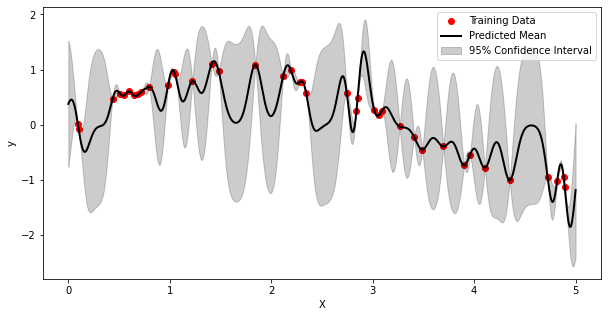

Point: 1.0, Predicted Variance: 0.0014161908885818029
Point: 2.5, Predicted Variance: 0.5213171597564545
Point: 4.0, Predicted Variance: 0.09502745031725583


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Define the kernel (RBF kernel)
kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Fit the Gaussian Process model to the training data
gp.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x[:, 0], y_mean - 1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
                 np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Points to find the predicted variance for
points = np.array([[1.0], [2.5], [4.0]])

# Predicting the mean and standard deviation for the specific points
y_pred_points, sigma_points = gp.predict(points, return_std=True)
variance_points = sigma_points ** 2

# Print the predicted variances for the specified points
for i, point in enumerate(points):
    print(f"Point: {point[0]}, Predicted Variance: {variance_points[i]}")


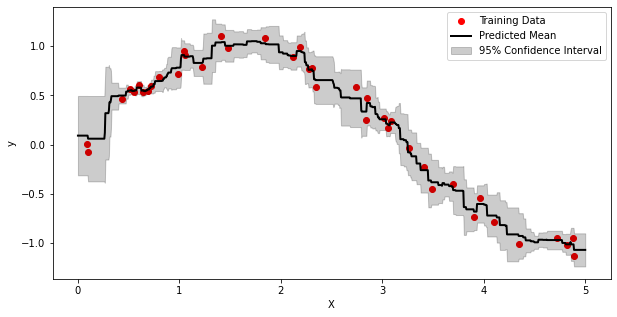

Point: 3.0846699843737846, Predicted Mean: 0.22631379449770075, Predicted Variance: 0.002985112559310245
Point: 1.79753950286893, Predicted Mean: 1.0445995235250924, Predicted Variance: 0.004013755596644601
Point: 1.9172075941288886, Predicted Mean: 1.0182526299050247, Predicted Variance: 0.009159589601508356
Point: 4.883805440951686, Predicted Mean: -1.011104531938962, Predicted Variance: 0.007316944718363378
Point: 2.8421697443432423, Predicted Mean: 0.33642311038873657, Predicted Variance: 0.015758237624304942
Point: 4.4588650039103985, Predicted Mean: -0.9706640028980832, Predicted Variance: 0.0038087925259084926
Point: 3.9957928210836178, Predicted Mean: -0.6011940763080886, Predicted Variance: 0.009322784532412488
Point: 4.16309922773969, Predicted Mean: -0.8155125559121847, Predicted Variance: 0.01649813277248211
Point: 3.02422759872523, Predicted Mean: 0.2583401720785651, Predicted Variance: 0.0031005230552682774
Point: 4.189724537494019, Predicted Mean: -0.8155125559121847, Pr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Create and train the Random Forest Regressor
n_trees = 100
rf = RandomForestRegressor(n_estimators=n_trees, random_state=0)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Estimate prediction variance using the individual tree predictions
tree_predictions = np.zeros((n_trees, len(X_test)))
for i, tree in enumerate(rf.estimators_):
    tree_predictions[i] = tree.predict(X_test)

# Calculate the mean and variance of the predictions
y_pred_mean = np.mean(tree_predictions, axis=0)
y_pred_var = np.var(tree_predictions, axis=0)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean = rf.predict(x)
tree_predictions_x = np.zeros((n_trees, len(x)))
for i, tree in enumerate(rf.estimators_):
    tree_predictions_x[i] = tree.predict(x)

y_pred_mean_x = np.mean(tree_predictions_x, axis=0)
y_pred_var_x = np.var(tree_predictions_x, axis=0)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_pred_mean_x, 'k', lw=2, label='Predicted Mean')
plt.fill_between(x.ravel(), y_pred_mean_x - 1.96 * np.sqrt(y_pred_var_x),
                 y_pred_mean_x + 1.96 * np.sqrt(y_pred_var_x), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the predicted variance for the test data points
for i, (x_val, y_mean_val, y_var_val) in enumerate(zip(X_test, y_pred_mean, y_pred_var)):
    print(f"Point: {x_val[0]}, Predicted Mean: {y_mean_val}, Predicted Variance: {y_var_val}")
